## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is, so it s not a "predictive" and should be dropped before any modeling. 

Shape and Margin althouh nominal, are represented by number of increasing irregularity (shape) or increasing association with malignancy (margin)

Age, shape, margin, and density attributes are the features used byt the modeling approaches.
"Severity" is the classification (target), so what the models will predict based on the available attributes.


###  Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* XGBoost
* NN



## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [32]:
import pandas as pd

# there is some missing data, some entries show up as '?' -- > convert this to NaN when loading the data
# The data text file "ammographic_masses.data.txt", does not have a header. Appropriate names for the columns should be passed when loading the data

column_names = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']  # from dataset information: 'mammographic_masses.names.txt'
masses_data = pd.read_csv('mammographic_masses.data.txt', names = column_names, na_values = ['?'])
masses_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [33]:
masses_data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [34]:
# check how the missing data is distributed. Density is the the column wit more missing data.
masses_data.loc[(masses_data['Age'].isnull()) |
              (masses_data['Shape'].isnull()) |
              (masses_data['Margin'].isnull()) |
              (masses_data['Density'].isnull())]


,BI-RADS,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [35]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [36]:
# check if the dataset is balanced 
masses_data['Severity'].value_counts()

Severity
0    427
1    403
Name: count, dtype: int64

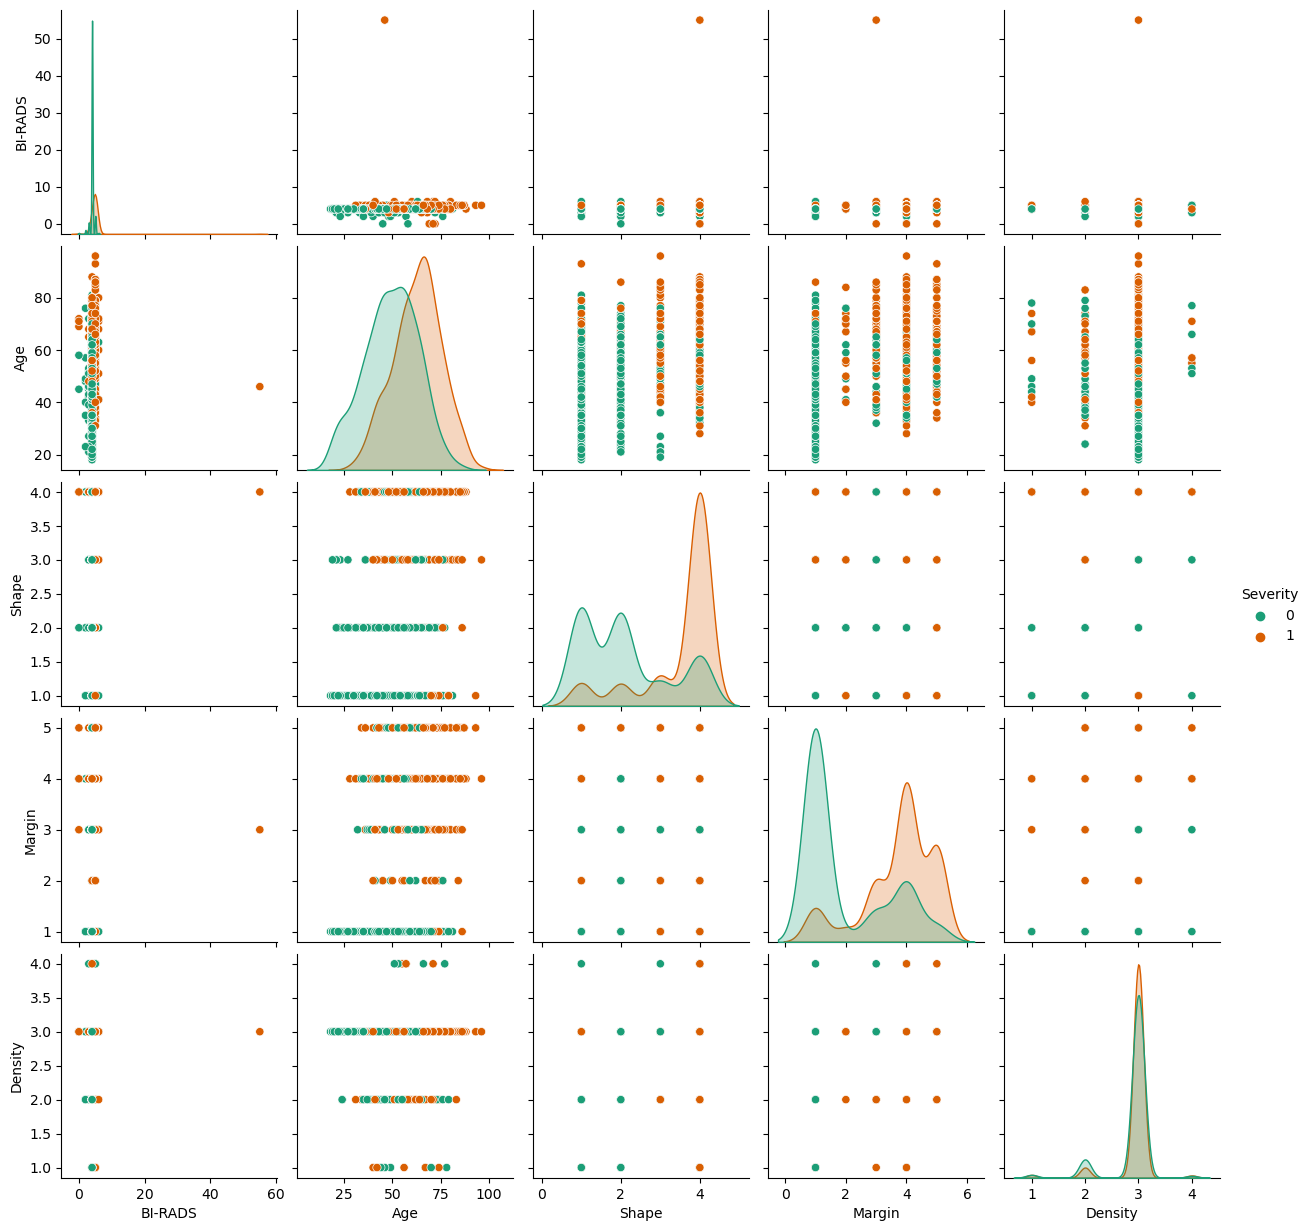

In [55]:
import seaborn as sns
sns.pairplot(masses_data,hue='Severity',palette='Dark2')

In [37]:
# now there are 830 records to proceed with.
# Convert Pandas dataframes into numpy arrays

X = masses_data[['Age', 'Shape','Margin', 'Density']].values

y = masses_data['Severity'].values

feature_names = ['Age', 'Shape', 'Margin', 'Density']

In [38]:
X[:5]

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       [57.,  1.,  5.,  3.],
       [76.,  1.,  4.,  3.]])

In [39]:
y[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [40]:
import numpy
from sklearn.model_selection import train_test_split

#splitting the data prior to scaling to avoid data leakage
numpy.random.seed(42)
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [41]:
from sklearn import preprocessing

# Some models require the input data to be normalized
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.84636045,  0.9635623 ,  1.40413959,  0.25334517],
       [-1.68694652, -0.64197187, -1.1572579 ,  0.25334517],
       [-0.65993018,  0.9635623 ,  0.12344084,  0.25334517],
       ...,
       [ 1.87337679,  0.9635623 ,  0.76379022,  0.25334517],
       [ 0.7778927 ,  0.9635623 ,  1.40413959,  0.25334517],
       [ 0.84636045, -1.44473896, -1.1572579 ,  0.25334517]])

In [43]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.23015065, -1.44473896, -1.1572579 ,  0.25334517],
       [-0.79686569, -0.64197187, -1.1572579 ,  0.25334517],
       [-0.04372037,  0.9635623 ,  1.40413959,  0.25334517],
       [-2.16622081, -0.64197187, -1.1572579 ,  0.25334517],
       [-0.65993018, -1.44473896, -1.1572579 ,  0.25334517],
       [ 1.25716699,  0.16079521, -0.51690853,  0.25334517],
       [-0.18065589,  0.9635623 ,  1.40413959,  0.25334517],
       [-0.59146242, -1.44473896, -1.1572579 , -2.64702022],
       [-1.61847876, -1.44473896, -1.1572579 ,  0.25334517],
       [ 0.43555392,  0.9635623 ,  0.76379022,  0.25334517],
       [-0.11218813,  0.9635623 ,  1.40413959,  0.25334517],
       [ 1.12023148,  0.9635623 ,  1.40413959,  0.25334517],
       [-0.9338012 ,  0.9635623 ,  1.40413959,  0.25334517],
       [ 0.43555392, -0.64197187,  0.76379022,  0.25334517],
       [ 0.7778927 ,  0.9635623 ,  1.40413959,  0.25334517],
       [-0.45452691, -1.44473896, -1.1572579 ,  0.25334517],
       [ 0.29861841,  0.

In [44]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((664, 4), (664,), (166, 4), (166,))

## Decision Trees


In [45]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
clf.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=0)

Visualize the resultingh DT

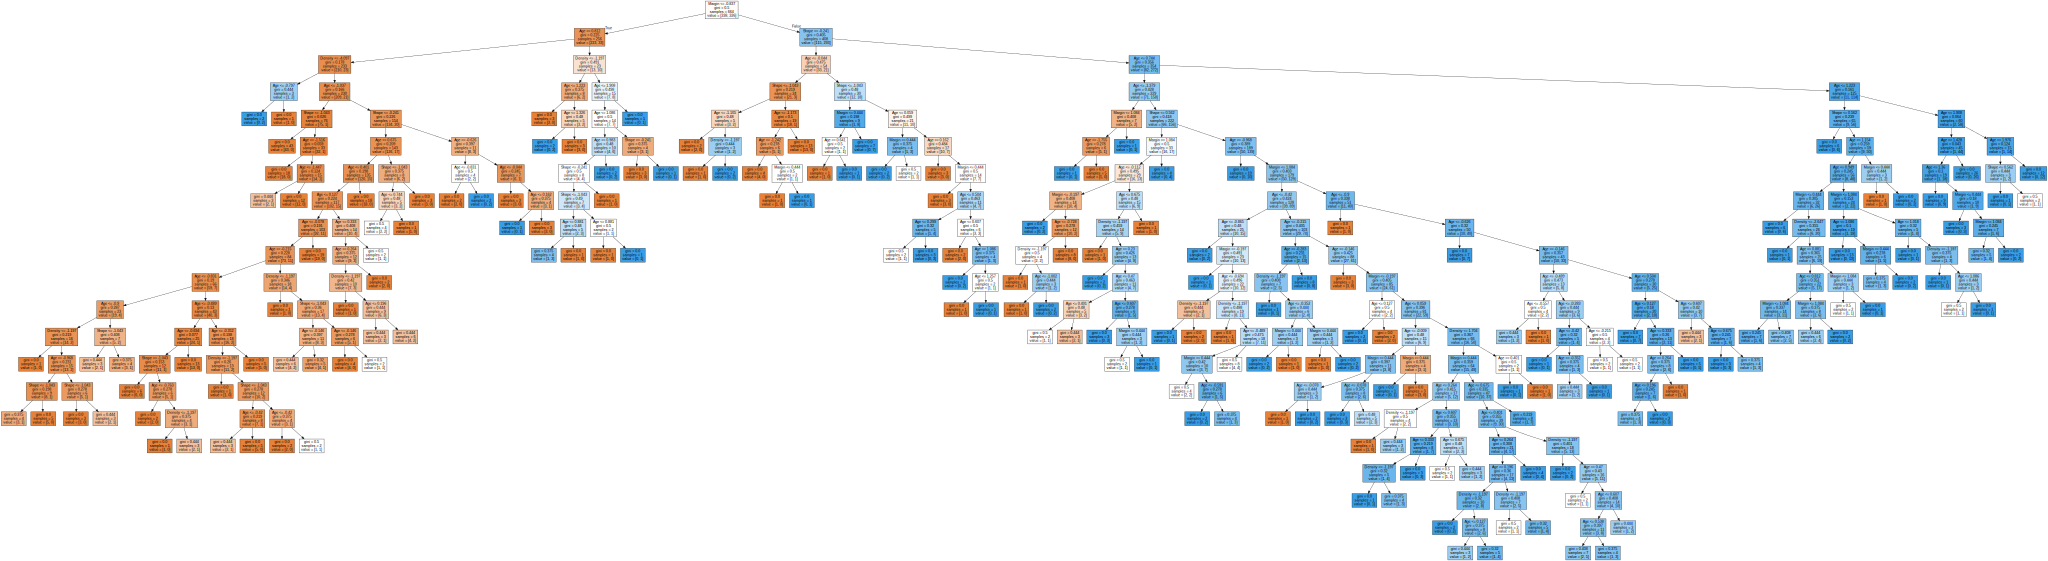

In [46]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

The data set is balance, use accuracy as metric to evaluate the different models.

In [47]:
# clf.score will retune the mean accuracy 
training_accuracy = clf.score(X_train_scaled, y_train)
test_accuracy = clf.score(X_test_scaled, y_test)
print(f'The mean accuracy on the training data set is {training_accuracy:.2f} and on the test set is {test_accuracy:.2f}')

The mean accuracy on the training data set is 0.90 and on the test set is 0.75


There is overfitting, and the accuracy in the test set is below 80%.

Use K-Fold cross validation (K=10)

In [49]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
cv_scores.mean()

0.7439846223428314

## RandomForestClassifier 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from 

clf = RandomForestClassifier(n_estimators=10, random_state=0)
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)

cv_scores.mean()

0.7529850746268656

In [52]:
# Use RandomizedSearchCV for hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [10, 50,100],
              'max_depth': [5,10,20]}

rf = RandomForestClassifier(random_state=0)
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=10)

rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 50, 100]})

In [53]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 50, 'max_depth': 5}


In [54]:
rf_2 = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state=0).fit(X_train_scaled, y_train)
rf_2.score(X_test_scaled, y_test)


0.8132530120481928

In [99]:
from sklearn.metrics import accuracy_score
y_pred = rf_2.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.8132530120481928

With some parameter optimization the mean accuracy on the test set increased to 81.3%

## XGBoost

In [94]:
from xgboost import XGBClassifier


estimator = XGBClassifier(objective= 'binary:logistic', seed=42)
param_grid = {
    "max_depth": [1, 3, 5],
    'n_estimators': range(60, 220, 40),
    "learning_rate": [0.1, 0.05, 0.01],
    "gamma": [0, 0.25, 1, 2, 5],
    "reg_lambda": [0, 1, 10, 30, 50],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring = 'accuracy', n_jobs = -1, cv = 10)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.25, 1, 2, 5],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [1, 3, 5],
                         'n_estimators': range(60, 220, 40),
                         'reg_lambda': [0, 1, 10, 30, 50],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [95]:
best_xgb = grid_search.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_lambda': 30,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [98]:
xgb_best = XGBClassifier(max_depth = 3, gamma = 0, colsample_bytree= 0.8,learning_rate = 0.05,
                         n_estimators = 100, scale_pos_weight = 1, subsample = 0.8, objective= 'binary:logistic')
xgb_best.fit(X_train_scaled, y_train)
y_pred = xgb_best.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred)
accuracy_xgb

0.8192771084337349

## SVM

In [61]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  


# try the different kernels
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']


def get_classifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
 

for i in range(4):
    svclassifier = get_classifier(i) # C will take the default value 1
    svclassifier.fit(X_train_scaled, y_train)
    y_pred = svclassifier.predict(X_test_scaled)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        89
           1       0.62      0.97      0.76        77

    accuracy                           0.72       166
   macro avg       0.79      0.73      0.71       166
weighted avg       0.80      0.72      0.70       166

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        89
           1       0.73      0.92      0.82        77

    accuracy                           0.81       166
   macro avg       0.82      0.81      0.81       166
weighted avg       0.83      0.81      0.81       166

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        89
           1       0.67      0.86      0.75        77

    accuracy                           0.73       166
   macro avg       0.75      0.74      0.73     

In [67]:
from sklearn.model_selection import GridSearchCV
# Proceed with hyperparameter tuning with RBF and Sigmoid kernels
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid']}
grid = GridSearchCV(SVC(),param_grid,scoring = 'accuracy', refit=True)
grid.fit(X_train_scaled,y_train)
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=100, gamma=0.01)
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [70]:
from sklearn.metrics import accuracy_score
grid_predictions = grid.predict(X_test_scaled)
print(classification_report(y_test,grid_predictions))
accuracy_rbf = accuracy_score(y_test, grid_predictions)
accuracy_rbf

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        89
           1       0.73      0.92      0.82        77

    accuracy                           0.81       166
   macro avg       0.82      0.81      0.81       166
weighted avg       0.83      0.81      0.81       166



0.8072289156626506

## KNN

In [81]:
from sklearn import neighbors
import numpy as np
# selecting the number of n_neighbors

mean_scores = []
k_values = []
for k in range(5, 55, 5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    mean_scores.append(np.mean(cv_scores))
    k_values.append(k)



Text(0, 0.5, 'Accuracy Score')

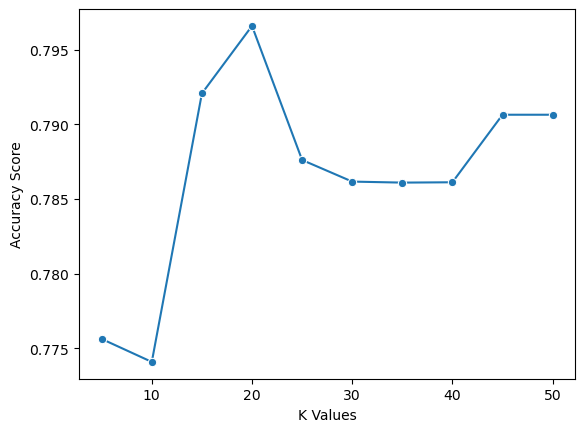

In [83]:
import matplotlib.pyplot as plt
sns.lineplot(x = k_values, y = mean_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [84]:
# use n_neighbors=20
clf = neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train_scaled, y_train) 
y_pred = clf.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.8192771084337349

## Naive Bayes

In [87]:
# rescaling the data using MinMaxScaler so that the features are in the range MultinomialNB requires

scaler = preprocessing.MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [100]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
cv_scores = cross_val_score(clf, X_train_minmax, y_train, cv=10)

cv_scores.mean()

0.7772501130710086

In [104]:
# Mean score below the 2 best models so far
clf.fit(X_train_minmax, y_train)
y_pred = clf.predict(X_test_minmax)
accuracy_nb = accuracy_score(y_test, y_pred)
accuracy_nb

0.8072289156626506

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
cv_scores.mean()

0.79520578923564

In [92]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , LogisticRegression(random_state=0))])
param_grid = [
    {'classifier' : [LogisticRegression(random_state=1)],
     'classifier__penalty' : ['l1', 'l2'],
     'classifier__C' : np.logspace(-4, 4, 20), 
     'classifier__solver' : ['liblinear']}]

clf_cv = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
clf_cv = clf_cv.fit(X_train_scaled, y_train)

print(clf_cv.best_params_)
clf_log_best = LogisticRegression(C=clf_cv.best_params_['classifier__C'],
                                  random_state=0,
                                  solver=clf_cv.best_params_['classifier__solver'])
clf_log_best.fit(X_train_scaled, y_train)
y_pred = clf_log_best.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_lr


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'classifier': LogisticRegression(C=0.004832930238571752, random_state=1, solver='liblinear'), 'classifier__C': 0.004832930238571752, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


0.8313253012048193

In [105]:
accuracy_comp = {
    'Models' : ['Random Forest', 'XGBoost', 'SVM_RBF', 'KNN', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy Score' : [accuracy_rf, accuracy_xgb, accuracy_rbf, accuracy_knn,accuracy_nb, accuracy_lr]
}
df_accuracy = pd.DataFrame(accuracy_comp)
df_accuracy

,Models,Accuracy Score
0,Random Forest,0.813253
1,XGBoost,0.819277
2,SVM_RBF,0.807229
3,KNN,0.819277
4,Naive Bayes,0.807229
5,Logistic Regression,0.831325


From the evaluated models,Logist Regression is the on performing better based on accuracy. It might be important to look at recall due to the implications of false negatives. 